In [1]:
"""
The purpose of this Jupyter notebook is to reproduce or at least
approximate the Z-scores deposited in the TSV file of the VACV WR
screen.
"""

'\nThe purpose of this Jupyter notebook is to reproduce or at least\napproximate the Z-scores deposited in the TSV file of the VACV WR\nscreen.\n'

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
path_to_VACV_report = (
    "/Users/jacobanter/Documents/Code/VACV_screen/VacciniaReport_"
    "20170223-0958_ZScored_conc_and_NaN_adjusted.csv"
)

VACV_report_df = pd.read_csv(
    path_to_VACV_report,
    sep="\t"
)

/var/folders/j1/64kbg_f11z97kx1dw__420vh0000gn/T/ipykernel_1373/2894677132.py:6: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  VACV_report_df = pd.read_csv(


In [4]:
NaN_Z_scores_subset_df = VACV_report_df[
    np.isnan(VACV_report_df[
        "dIntensity_cLatePathogen_eMean_oVoronoiCells_nZScore"
    ])
]

print(set(NaN_Z_scores_subset_df["WELL_QUALITY_STATUS"]))

{'BAD', 'Not available', 'UNKNOWN'}


In [5]:
# Closer scrutiny of the TSV file reveals the following interesting
# information:
# As already observed earlier, the columns containing Z-scores are not
# continuously populated
# A closer examination reveals that Z-scores are not provided for a
# "WELL_QUALITY_STATUS" value of "BAD", "Not available" or "UNKNOWN"
# It is investigated whether there is a strict correlation between the
# presence of Z-scores and the well quality
no_good_well_quality_df = VACV_report_df[
    (VACV_report_df["WELL_QUALITY_STATUS"] == "BAD")
    |
    (VACV_report_df["WELL_QUALITY_STATUS"] == "Not available")
    |
    (VACV_report_df["WELL_QUALITY_STATUS"] == "UNKNOWN")
]

print(set(no_good_well_quality_df[
    "dIntensity_cLatePathogen_eMean_oVoronoiCells_nZScore"
]))

{0.78125, 1.1875, 2.0, -0.5625, -0.28125, -0.875, -0.625, 5.3125, -0.375, 0.9375, 0.5, -0.78125, 7.625, 2.25, 2.3125, 2.6875, 3.625, 3.8125, 2.1875, 3.0, 2.125, 5.5, 1.5625, 1.0625, 1.125, -0.90625, -0.1875, 0.46875, 0.125, 1.3125, -0.40625, 0.8125, 43.8279, 2.5, -1.7252, -1.9127, -1.6627, -1.1002, -1.2877, 1.2123, 1.4623, 1.0873, 1.5873, 1.6498, 2.7123, 2.2748, 2.0873, 2.3373, 2.1498, 2.5248, 0.0037284, 2.3998, 2.8998, 3.1498, 0.29683, -0.32817, 0.32808, 0.45308, 0.26558, -0.42192, -0.087536, 0.0065247, 1.25, -0.34375, 1.4375, 0.84375, 1.5, 1.8125, 0.40625, 1.375, -0.75, -0.65625, 0.10933, -0.10942, 0.20308, -0.23442, -0.14067, 0.14058, -0.20317, 2.0744, 2.8869, 2.0119, 2.5744, 2.3869, 2.4494, 211.1957, -0.81617, -0.53492, -0.90992, 0.80736, -0.66139, -0.72389, 0.65111, 0.61986, 0.87491, 0.81241, 0.67183, 0.51558, -0.67192, -0.57817, 0.70308, -0.82817, 0.73433, 0.60933, -0.00097753, 0.059303, -0.94762, -0.35387, -0.26012, 0.86488, -0.38512, -0.29137, -0.57262, 0.83363, 0.52113, 0.7398

In [6]:
# It emerges that there is no strict correlation between the presence of
# Z-scores and the well quality
# It is investigated whether Z-soores are also provided for wells of bad
# quality
print(set(VACV_report_df.loc[
    ~np.isnan(
        VACV_report_df["dIntensity_cLatePathogen_eMean_oVoronoiCells_nZScore"]
    ),
    "WELL_QUALITY_STATUS"
]))

{'WARNING', 'UNKNOWN', 'BAD'}


In [7]:
# This finding ultimately falsifies the hypothesis that there might be
# a correlation between the presence of Z-scores and the well quality
# In a last attempt to uncover potential correlations, it is checked
# whether there are columns having only one value for the NaN subset
for column in NaN_Z_scores_subset_df.columns:
    n_vals = len(set(NaN_Z_scores_subset_df[column]))

    if n_vals == 1:
        unique_val = np.unique(NaN_Z_scores_subset_df[column])[0]
        print(
            f"The \"{column}\" column has only one value, namely "
            f"\"{unique_val}\"."
        )

The "PlateType" column has only one value, namely "PLATE".
The "Group" column has only one value, namely "VACCINIA_TEAM".
The "ExperimentType" column has only one value, namely "SIRNA_HCS".
The "PATHOGEN" column has only one value, namely "Vacciniavirus".
The "Precursor_Accession" column has only one value, namely "Not available".
The "Precursor_Name" column has only one value, namely "Not available".
The "Precursor_Alternative_Names" column has only one value, namely "Not available".


In [8]:
# Also investigate whether the computation of Z-scores has been confined
# to certain well types
all_well_types = set(VACV_report_df["WellType"])
Z_scored_well_types = set(VACV_report_df.loc[
    ~np.isnan(VACV_report_df[
        "dIntensity_cLatePathogen_eMean_oVoronoiCells_nZScore"
    ]),
    "WellType"
])

print(all_well_types - Z_scored_well_types)

{'Not available'}


In [9]:
# These findings suggest that there is no correlation regarding the
# presence of Z-scores whatsoever

# The procedure for the computation of Z-scores is outlined in the
# supplementary material of the publication "Simultaneous analysis of
# large-scale RNAi screens for pathogen entry"
#
# According to the information provided there, the Z-scores are computed
# in two steps
# The first step involves the computation of Z-scores in a plate-wise
# manner, i.e. the mean and the standard are computed within individual
# plates (plate Z-scoring)
# The second step consists of Z-scoring the whole screen; to this end,
# the mean and standard deviation of the whole screen are emoloyed
# (however, the supplementary material does not specify how the mean and
# the standard deviation of the whole screen are computed; two ways are
# conceivable: on the one hand, they might be computed based on the
# individual rows of the TSV file; on the other hand, they might be
# computed based on the values of the individual plates)

# It is commenced with the plate-wise Z-scoring
# To this end, the unique plates IDs (i.e. "Barcode" values) have to be
# determined
plate_IDs = np.unique(VACV_report_df["Barcode"])

# Also determine names of non-Z-scored intensity columns for early and
# late genes
non_Z_scored_int_columns = [
    column for column in VACV_report_df.columns
    if
    ("Intensity" in column)
    and
    ("ZScore" not in column)
]

early_non_Z_scored_int_columns = [
    column for column in non_Z_scored_int_columns
    if "Late" not in column
]
late_non_Z_scored_int_columns = [
    column for column in non_Z_scored_int_columns
    if "Late" in column
]

In [15]:
# As the raw and the Z-scored intensities do not have the same ordering,
# they are sorted in alphabetical order
early_non_Z_scored_int_columns = sorted(early_non_Z_scored_int_columns)
late_non_Z_scored_int_columns = sorted(late_non_Z_scored_int_columns)

# Verify that the ordering within raw intensities still matches
# To this end, the last of the elements obtained by splitting the column
# names via "_" has to be compared
for early_int_col, late_int_col in zip(
    early_non_Z_scored_int_columns, late_non_Z_scored_int_columns
):
    early_name = early_int_col.split("_")[-1]
    late_name = late_int_col.split("_")[-1]

    assert early_name == late_name, (
        "There is a mismatch in the ordering of the raw intensities!"
    )

In [13]:
# Now, compute the mean as well as the standard deviation for each plate
# Bear in mind that the two statistics have to be computed separately
# for early and late intensities
early_mean_and_std_per_plate = []
late_mean_and_std_per_plate = []

for plate_ID in plate_IDs:
    plate_subset = VACV_report_df[
        VACV_report_df["Barcode"] == plate_ID
    ]

    # As some rows and the `dIntensity_cPathogen_eMean_oCells` column
    # altogether are populated with `NaN`, the `NaN` equivalents of the
    # NumPy functions for mean and standard deviation have to be used
    early_mean = np.nanmean(
        plate_subset[early_non_Z_scored_int_columns]
    )
    early_std = np.nanstd(
        plate_subset[early_non_Z_scored_int_columns]
    )
    early_mean_and_std_per_plate.append((early_mean, early_std))

    late_mean = np.nanmean(
        plate_subset[late_non_Z_scored_int_columns]
    )
    late_std = np.nanstd(
        plate_subset[late_non_Z_scored_int_columns]
    )
    late_mean_and_std_per_plate.append((late_mean, late_std))

In [14]:
# Determine the names of Z-scored columns for early and late intensities
# each
Z_scored_int_columns = [
    column for column in VACV_report_df.columns
    if
    ("Intensity" in column)
    and
    ("ZScore" in column)
]

early_Z_scored_int_columns = [
    column for column in Z_scored_int_columns
    if "Late" not in column
]
late_Z_scored_int_columns = [
    column for column in Z_scored_int_columns
    if "Late" in column
]

In [17]:
# In order to ensure that the order of the Z-scored columns matches the
# order of the raw intensity columns, the Z-scored columns are sorted in
# alphabetical order as well
early_Z_scored_int_columns = sorted(early_Z_scored_int_columns)
late_Z_scored_int_columns = sorted(late_Z_scored_int_columns)

# Now, verify that both the ordering within the Z-scored columns and
# that of raw and Z-scored columns matches
# In the case of the Z-scored columns, the penultimate of the elements
# obtained by splitting the column name via "_" has to be compared
for (
    early_non_Z_scored_col, late_non_Z_scored_col, early_Z_scored_col,
    late_Z_scored_col
) in zip(
    early_non_Z_scored_int_columns, late_non_Z_scored_int_columns,
    early_Z_scored_int_columns, late_Z_scored_int_columns
):
    early_non_Z_scored_name = early_non_Z_scored_col.split("_")[-1]
    late_non_Z_scored_name = late_non_Z_scored_col.split("_")[-1]

    early_Z_scored_name = early_Z_scored_col.split("_")[-2]
    late_Z_scored_name = late_Z_scored_col.split("_")[-2]

    assert early_non_Z_scored_name == late_non_Z_scored_name, (
        "There is a mismatch in the ordering of the raw intensity "
        "columns!"
    )

    assert early_Z_scored_name == late_Z_scored_name, (
        "There is a mismatch in the ordering of the Z-scored intensity "
        "columns!"
    )

    assert early_non_Z_scored_name == early_Z_scored_name, (
        "There is a mismatch between the column names of raw "
        "intensities and those of Z-scored intensities."
    )

In [18]:
# To err on the side of caution, the ordering is also visually inspected
print(early_non_Z_scored_int_columns)
print(late_non_Z_scored_int_columns)
print()
print(early_Z_scored_int_columns)
print(late_Z_scored_int_columns)

['dIntensity_cPathogen_eMean_oCells', 'dIntensity_cPathogen_eMean_oNuclei', 'dIntensity_cPathogen_eMean_oPeriNuclei', 'dIntensity_cPathogen_eMean_oVoronoiCells']
['dIntensity_cLatePathogen_eMean_oCells', 'dIntensity_cLatePathogen_eMean_oNuclei', 'dIntensity_cLatePathogen_eMean_oPeriNuclei', 'dIntensity_cLatePathogen_eMean_oVoronoiCells']

['dIntensity_cPathogen_eMean_oCells_nZScore', 'dIntensity_cPathogen_eMean_oNuclei_nZScore', 'dIntensity_cPathogen_eMean_oPeriNuclei_nZScore', 'dIntensity_cPathogen_eMean_oVoronoiCells_nZScore']
['dIntensity_cLatePathogen_eMean_oCells_nZScore', 'dIntensity_cLatePathogen_eMean_oNuclei_nZScore', 'dIntensity_cLatePathogen_eMean_oPeriNuclei_nZScore', 'dIntensity_cLatePathogen_eMean_oVoronoiCells_nZScore']


In [19]:
# In order to be able to retrieve the deposited values later, a deep (!)
# copy of the VACV report DataFrame is created the Z-scores of which are
# overwritten with the computed ones
VACV_report_computed_Z_scores_df = VACV_report_df.copy()

for plate_ID, early_val_pair, late_val_pair in zip(
    plate_IDs, early_mean_and_std_per_plate, late_mean_and_std_per_plate
):
    # When trying to update multiple DataFrame columns at once via
    # another DataFrame, care must be taken due to how Pandas aligns
    # data when assigning between DataFrames
    # In detail, when attempting to assign values from a DataFrame to
    # the slice of another DataFrame, it is tried to align both rows and
    # and columns by their labels
    # In case of a mismatch between column names, unmatched columns are
    # filled with `NaN`
    # In order to avoid label alignment issues, the right-hand side of
    # the assignment statement must be converted to a NumPy array
    VACV_report_computed_Z_scores_df.loc[
        VACV_report_computed_Z_scores_df["Barcode"] == plate_ID,
        early_Z_scored_int_columns
    ] = (
        (VACV_report_computed_Z_scores_df.loc[
            VACV_report_computed_Z_scores_df["Barcode"] == plate_ID,
            early_non_Z_scored_int_columns
        ] - early_val_pair[0])
        /
        early_val_pair[1]
    ).to_numpy()

    VACV_report_computed_Z_scores_df.loc[
        VACV_report_computed_Z_scores_df["Barcode"] == plate_ID,
        late_Z_scored_int_columns
    ] = (
        (VACV_report_computed_Z_scores_df.loc[
            VACV_report_computed_Z_scores_df["Barcode"] == plate_ID,
            late_non_Z_scored_int_columns
        ] - late_val_pair[0])
        /
        late_val_pair[1]
    ).to_numpy()

In [20]:
# Now, address the second Z-scoring step, i.e. Z-scoring the whole
# screen
# Two different methods of Z-scoring the whole screen are tried out, the
# first of which consists of using the mean and the standard deviation
# based on the individual rows
early_pan_screen_mean = np.nanmean(
    VACV_report_df[early_non_Z_scored_int_columns]
)
early_pan_screen_std = np.nanstd(
    VACV_report_df[early_non_Z_scored_int_columns]
)

late_pan_screen_mean = np.nanmean(
    VACV_report_df[late_non_Z_scored_int_columns]
)
late_pan_screen_std = np.nanstd(
    VACV_report_df[late_non_Z_scored_int_columns]
)

In [21]:
print(
    "Plate-wise mean and standard deviation of early intensities:\n",
    early_mean_and_std_per_plate
)
print(
    "Plate-wise mean and standard deviation of late intensities:\n",
    late_mean_and_std_per_plate
)
print()
print(
    "Mean and standard deviation of the entire screen for early "
    f"intensities:\n{early_pan_screen_mean}, {early_pan_screen_std}"
)
print(
    "Mean and standard deviation of the entire screen for late "
    f"intensities:\n{late_pan_screen_mean}, {late_pan_screen_std}"
)

Plate-wise mean and standard deviation of early intensities:
 [(0.037287422821180555, 0.0009340425790090351), (0.035821093038194446, 0.0014750326257438006), (0.03835762901909722, 0.002058546706131198), (0.03961241111111111, 0.0020197719281859526), (0.023195718580729167, 0.0026122897415153815), (0.020240403352864585, 0.0022513587820631362), (0.022265571861979166, 0.00285764666512138), (0.02202766626736111, 0.0036647507912907166), (0.023418899704861114, 0.0031995346440649984), (0.024714276006944442, 0.004050174467305886), (0.06571770075520833, 0.015167515111569057), (0.0540090348828125, 0.019408870738245307), (0.06341957789062501, 0.016316023348691238), (0.041938492812500006, 0.011761876578390102), (0.060191619661458334, 0.017064556221465653), (0.07654156377604167, 0.02150920087741264), (0.0267632147265625, 0.006375228207611191), (0.06607207997395832, 0.017740759772210138), (0.05405999895833333, 0.019165229576433036), (0.04205691013671875, 0.008134319834153093), (0.05681666905598959, 0.0

In [22]:
whole_screen_Z_scoring_first_way_df = VACV_report_df.copy()

whole_screen_Z_scoring_first_way_df.loc[
    :, early_Z_scored_int_columns
] = (
    (whole_screen_Z_scoring_first_way_df.loc[
        :, early_non_Z_scored_int_columns
    ] - early_pan_screen_mean)
    /
    early_pan_screen_std
).to_numpy()

whole_screen_Z_scoring_first_way_df.loc[
    :, late_Z_scored_int_columns
] = (
    (whole_screen_Z_scoring_first_way_df.loc[
        :, late_non_Z_scored_int_columns
    ] - late_pan_screen_mean)
    /
    late_pan_screen_std
).to_numpy()

In [23]:
# Now, it is time to compute the differences between the computed and
# the deposited Z-scores and to visualise their distribution via
# histograms
# This procedure is done both for the first and the second step

# Differences and their visualisation for the first step, i.e.
# plate-wise Z-scoring
# Once again, bear in mind that conversion to NumPy arrays is advisable
# as this obviates label alignment issues
early_differences_plate_wise = np.abs(
    (VACV_report_computed_Z_scores_df[early_Z_scored_int_columns].to_numpy()
    -
    VACV_report_df[early_Z_scored_int_columns].to_numpy()).flatten()
)
early_differences_plate_wise = early_differences_plate_wise[
    ~np.isnan(early_differences_plate_wise)
]

late_differences_plate_wise = np.abs(
    (VACV_report_computed_Z_scores_df[late_Z_scored_int_columns].to_numpy()
    -
    VACV_report_df[late_Z_scored_int_columns].to_numpy()).flatten()
)
late_differences_plate_wise = late_differences_plate_wise[
    ~np.isnan(late_differences_plate_wise)
]

In [24]:
print(early_differences_plate_wise)
print(np.mean(early_differences_plate_wise))

print(late_differences_plate_wise)
print(np.mean(late_differences_plate_wise))

[0.78359991 0.35697984 0.70029691 ... 0.0941292  1.84953421 2.10771682]
0.7111508328603077
[0.66590651 0.57379114 0.61162347 ... 0.51758306 1.66887116 1.44788117]
0.7739815203501386


[4.65888e+05 5.83610e+04 5.92500e+03 6.72000e+02 1.41000e+02 4.70000e+01
 1.80000e+01 9.00000e+00 4.00000e+00 1.00000e+00 1.00000e+00 0.00000e+00
 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 1.00000e+00]
[2.37038072e-06 1.31713034e+00 2.63425831e+00 3.95138628e+00
 5.26851426e+00 6.58564223e+00 7.90277020e+00 9.21989817e+00
 1.05370261e+01 1.18541541e+01 1.31712821e+01 1.44884101e+01
 1.58055380e+01 1.71226660e+01 1.84397940e+01 1.97569219e+01
 2.10740499e+01 2.23911779e+01 2.37083059e+01 2.50254338e+01
 2.63425618e+01]

[5.30982e+05 5.80000e+01 2.20000e+01 1.00000e+00 0.00000e+00 1.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 2.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
 0.00000e+00 1.00000e+00]
[1.56038751e-06 1.81248752e+01 3.62497487e+01 5.43746223e+01
 7.24994959e+01 9.06243695e+01 1.08749243e+02 1.26874117e+02
 1.44998990e+02 1.63123864e+02 1.81248738e+02 1.99373611e+02
 2.1

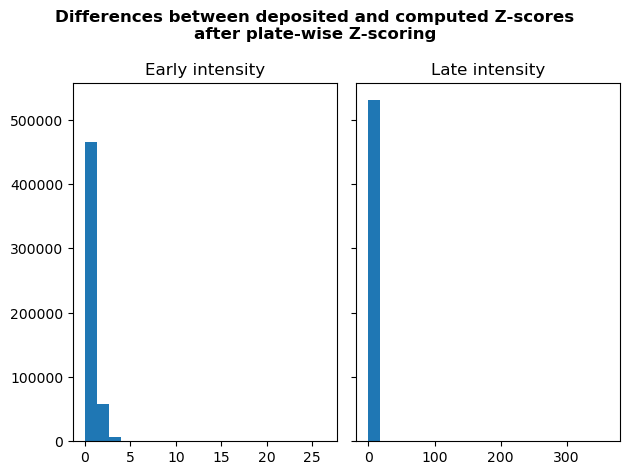

In [25]:
diffs = [early_differences_plate_wise, late_differences_plate_wise]
ax_titles = ["Early intensity", "Late intensity"]

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

fig.suptitle(
    "Differences between deposited and computed Z-scores\nafter "
    "plate-wise Z-scoring",
    fontweight="bold"
)

for ax, diff, ax_title in zip(axs, diffs, ax_titles):
    ax.set_title(ax_title)
    bin_vals, bin_edges, _ = ax.hist(diff, bins=20)
    print(bin_vals)
    print(bin_edges)
    print()

plt.show()

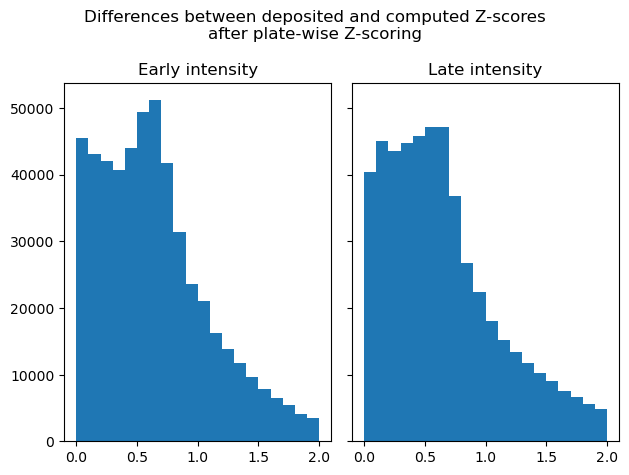

In [26]:
# Zoom in by setting the upper limit to 2
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

fig.suptitle(
    "Differences between deposited and computed Z-scores\nafter "
    "plate-wise Z-scoring",
    fontweight=True
)

for ax, ax_title, diff in zip(axs, ax_titles, diffs):
    ax.set_title(ax_title)
    bin_vals, bin_edges, _ = ax.hist(diff, bins=20, range=(diff.min(), 2))

plt.show()

In [27]:
# Now, the differences and their visualisation for the second step, i.e.
# Z-scoring the whole screen, are addressed
early_differences_whole_screen = np.abs(
    whole_screen_Z_scoring_first_way_df[early_Z_scored_int_columns].to_numpy()
    -
    VACV_report_df[early_Z_scored_int_columns].to_numpy()
).flatten()
early_differences_whole_screen = early_differences_whole_screen[
    ~np.isnan(early_differences_whole_screen)
]

late_differences_whole_screen = np.abs(
    whole_screen_Z_scoring_first_way_df[late_Z_scored_int_columns].to_numpy()
    -
    VACV_report_df[late_Z_scored_int_columns].to_numpy()
).flatten()
late_differences_whole_screen = late_differences_whole_screen[
    ~np.isnan(late_differences_whole_screen)
]

In [28]:
print(early_differences_whole_screen)
print(np.mean(early_differences_whole_screen))

print(late_differences_whole_screen)
print(np.mean(late_differences_whole_screen))

[1.31958289 1.0420308  1.72165013 ... 0.73309638 1.90125396 1.80934251]
1.0869372873113567
[1.89243452 1.65516777 1.51524001 ... 2.18357718 2.87724795 2.50805354]
1.182562119236617


In [ ]:
# Maybe ChatGPT can figure out how Z-scoring has been performed
# The TSV file passed to ChatGPT is supposed to contain the following
# columns: Barcode, the columns harbouring raw early and late
# intensities and the columns harbouring Z-scored early and late
# intensities
VACV_report_for_ChatGPT_df = VACV_report_df[
    ["Barcode"]
    +
    early_non_Z_scored_int_columns
    +
    late_non_Z_scored_int_columns
    +
    early_Z_scored_int_columns
    +
    late_Z_scored_int_columns
]

VACV_report_for_ChatGPT_df.to_csv(
    "VACV_Report_for_ChatGPT.tsv",
    sep="\t",
    header=True,
    index=False
)

In [29]:
# According to ChatGPT, the information regarding plate-wise Z-scoring
# and the distinction between early and late intensities seems to be
# valid
# However, ChatGPT states that a good approximation of the deposited
# Z-scores can be achieved when computing the mean and the standard
# deviation for each column separately
# This is now tried out
early_mean_and_std_per_plate_and_per_col = []
late_mean_and_std_per_plate_and_per_col = []

for plate_ID in plate_IDs:
    early_mean_and_std_per_col = []
    late_mean_and_std_per_col = []

    plate_subset = VACV_report_df[
        VACV_report_df["Barcode"] == plate_ID
    ]

    for col in early_non_Z_scored_int_columns:
        col_subset = plate_subset[col]

        early_mean = np.nanmean(col_subset)
        early_std = np.nanstd(col_subset)

        early_mean_and_std_per_col.append((early_mean, early_std))

    for col in late_non_Z_scored_int_columns:
        col_subset = plate_subset[col]

        late_mean = np.nanmean(col_subset)
        late_std = np.nanstd(col_subset)

        late_mean_and_std_per_col.append((late_mean, late_std))
    
    early_mean_and_std_per_plate_and_per_col.append(
        early_mean_and_std_per_col
    )
    late_mean_and_std_per_plate_and_per_col.append(
        late_mean_and_std_per_col
    )

/var/folders/j1/64kbg_f11z97kx1dw__420vh0000gn/T/ipykernel_1373/4117458412.py:22: RuntimeWarning: Mean of empty slice
  early_mean = np.nanmean(col_subset)
/opt/homebrew/Caskroom/miniforge/base/envs/bioinformatics/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/var/folders/j1/64kbg_f11z97kx1dw__420vh0000gn/T/ipykernel_1373/4117458412.py:30: RuntimeWarning: Mean of empty slice
  late_mean = np.nanmean(col_subset)


In [31]:
# Check that for each plate, the pair of mean and standard deviation is
# different from NaN, except for the intensity of the entire cell (first
# pair for each plate after alphabetical sorting)
# The intensity of the entire cell is not consistently provided, i.e.
# sometimes it is provided, sometimes it is not
# Therefore, the plate IDs for which the intensity of the entire cell is
# provided are determined
# As the presence of intensities does not differ between early and late
# intensities, no distinction has to be made
plate_IDs_with_entire_cell_int = []

for plate_ID in plate_IDs:
    plate_subset = VACV_report_df[
        VACV_report_df["Barcode"] == plate_ID
    ]

    if ~np.isnan(
        plate_subset["dIntensity_cPathogen_eMean_oCells"]
    ).all():
        plate_IDs_with_entire_cell_int.append(plate_ID)

early_pairs_as_expected = []
late_pairs_as_expected = []

for early_plate, late_plate, plate_ID in zip(
    early_mean_and_std_per_plate_and_per_col,
    late_mean_and_std_per_plate_and_per_col,
    plate_IDs
):
    for i, (early_col, late_col) in enumerate(zip(
        early_plate, late_plate
    )):
        if i != 0:
            early_pairs_as_expected.append(
                ~np.isnan(early_col).any()
            )
            late_pairs_as_expected.append(
                ~np.isnan(late_col).any()
            )
        else:
            if (
                (~np.isnan(early_col).any()
                and
                (plate_ID in plate_IDs_with_entire_cell_int))
                or
                (np.isnan(early_col).all()
                and
                (plate_ID not in plate_IDs_with_entire_cell_int))
            ):
                early_pairs_as_expected.append(True)
            else:
                early_pairs_as_expected.append(False)
            
            if (
                (~np.isnan(late_col).any()
                and
                (plate_ID in plate_IDs_with_entire_cell_int))
                or
                (np.isnan(late_col).all()
                and
                (plate_ID not in plate_IDs_with_entire_cell_int))
            ):
                late_pairs_as_expected.append(True)
            else:
                late_pairs_as_expected.append(False)

assert all(early_pairs_as_expected), (
    "Not all early pairs of mean and standard deviation are as "
    "expected!"
)

assert all(late_pairs_as_expected), (
    "Not all late pairs of mean and standard deviation are as expected!"
)

In [32]:
# Now that the mean as well as the standard deviation have been computed
# both in a plate-wise manner and for each individual column, the
# Z-scores are computed based on them
# Once again, in order to be able to compute the differences to the
# deposited Z-scores, a deep copy of the original DataFrame is made
VACV_report_Z_scores_per_plate_and_per_col_df = VACV_report_df.copy()

for plate_ID, early_plate_val_pairs, late_plate_val_pairs in zip(
    plate_IDs,
    early_mean_and_std_per_plate_and_per_col,
    late_mean_and_std_per_plate_and_per_col
):
    for col_val_pair, non_Z_scored_col_name, Z_scored_col_name in zip(
        early_plate_val_pairs,
        early_non_Z_scored_int_columns,
        early_Z_scored_int_columns
    ):
        # Remember to convert the right-hand side of the assignment
        # statement to a NumPy array so as to avoid label alignment
        # issues
        VACV_report_Z_scores_per_plate_and_per_col_df.loc[
            VACV_report_Z_scores_per_plate_and_per_col_df["Barcode"]
            ==
            plate_ID,
            Z_scored_col_name
        ] = (
            (VACV_report_Z_scores_per_plate_and_per_col_df.loc[
                VACV_report_Z_scores_per_plate_and_per_col_df["Barcode"]
                ==
                plate_ID,
                non_Z_scored_col_name
            ] - col_val_pair[0])
            /
            col_val_pair[1]
        ).to_numpy()

    for col_val_pair, non_Z_scored_col_name, Z_scored_col_name in zip(
        late_plate_val_pairs,
        late_non_Z_scored_int_columns,
        late_Z_scored_int_columns
    ):
        VACV_report_Z_scores_per_plate_and_per_col_df.loc[
            VACV_report_Z_scores_per_plate_and_per_col_df["Barcode"]
            ==
            plate_ID,
            Z_scored_col_name
        ] = (
            (VACV_report_Z_scores_per_plate_and_per_col_df.loc[
                VACV_report_Z_scores_per_plate_and_per_col_df["Barcode"]
                ==
                plate_ID,
                non_Z_scored_col_name
            ] - col_val_pair[0])
            /
            col_val_pair[1]
        ).to_numpy()

In [33]:
# Now, compute the differences between the computed and the deposited
# Z-scores and subsequently visualise their distribution via histograms

# Once again, bear in mind that conversion to NumPy arrays is advisable
# as this obviates label alignment issues
early_differences_per_plate_and_per_col = np.abs(
    VACV_report_Z_scores_per_plate_and_per_col_df[
        early_Z_scored_int_columns
    ].to_numpy()
    -
    VACV_report_df[early_Z_scored_int_columns].to_numpy()
).flatten()
early_differences_per_plate_and_per_col = (
    early_differences_per_plate_and_per_col[
        ~np.isnan(early_differences_per_plate_and_per_col)
    ]
)

late_differences_per_plate_and_per_col = np.abs(
    VACV_report_Z_scores_per_plate_and_per_col_df[
        late_Z_scored_int_columns
    ].to_numpy()
    -
    VACV_report_df[late_Z_scored_int_columns].to_numpy()
).flatten()
late_differences_per_plate_and_per_col = (
    late_differences_per_plate_and_per_col[
        ~np.isnan(late_differences_per_plate_and_per_col)
    ]
)

In [34]:
print(
    "Differences between computed and deposited Z-scores for the early "
    "intensities:"
)
print(early_differences_per_plate_and_per_col)
print(
    "Minimum difference: "
    f"{early_differences_per_plate_and_per_col.min():.2f}\n"
    "Maximum difference: "
    f"{early_differences_per_plate_and_per_col.max():.2f}\n"
    "Mean difference: "
    f"{early_differences_per_plate_and_per_col.mean():.2f}\n"
)

print(
    "Differences between computed and deposited Z-scores for the late "
    "intensities:"
)
print(late_differences_per_plate_and_per_col)
print(
    "Minimum difference: "
    f"{late_differences_per_plate_and_per_col.min():.2f}\n"
    "Maximum difference: "
    f"{late_differences_per_plate_and_per_col.max():.2f}\n"
    "Mean difference: "
    f"{late_differences_per_plate_and_per_col.mean():.2f}"
)

Differences between computed and deposited Z-scores for the early intensities:
[0.12431295 0.10778435 0.15412434 ... 0.84170651 0.95851986 0.79256265]
Minimum difference: 0.00
Maximum difference: 22.63
Mean difference: 0.16


Differences between computed and deposited Z-scores for the late intensities:
[0.09418631 0.13123142 0.17095392 ... 0.39962296 0.49154146 0.41588099]
Minimum difference: 0.00
Maximum difference: 362.56
Mean difference: 0.20


In [35]:
# According to ChatGPT, using the sample standard deviation in lieu of
# the population standard deviation (i.e. the denominator is changed
# from "N" to "N - 1") further decreases the differences between
# computed and deposited Z-scores
# Thus, the procecure of Z-scoring is repeated, this time using the
# sample standard deviation rather than the population standard
# deviation
early_mean_and_sample_std_per_plate_and_per_col = []
late_mean_and_sample_std_per_plate_and_per_col = []

for plate_ID in plate_IDs:
    early_mean_and_sample_std_per_col = []
    late_mean_and_sample_std_per_col = []

    plate_subset = VACV_report_df[
        VACV_report_df["Barcode"] == plate_ID
    ]

    for col in early_non_Z_scored_int_columns:
        col_subset = plate_subset[col]

        early_mean = np.nanmean(col_subset)
        early_std = np.nanstd(col_subset, ddof=1)

        early_mean_and_sample_std_per_col.append((early_mean, early_std))

    for col in late_non_Z_scored_int_columns:
        col_subset = plate_subset[col]

        late_mean = np.nanmean(col_subset)
        late_std = np.nanstd(col_subset, ddof=1)

        late_mean_and_sample_std_per_col.append((late_mean, late_std))

    early_mean_and_sample_std_per_plate_and_per_col.append(
        early_mean_and_sample_std_per_col
    )
    late_mean_and_sample_std_per_plate_and_per_col.append(
        late_mean_and_sample_std_per_col
    )

/var/folders/j1/64kbg_f11z97kx1dw__420vh0000gn/T/ipykernel_1373/3124427534.py:22: RuntimeWarning: Mean of empty slice
  early_mean = np.nanmean(col_subset)
/opt/homebrew/Caskroom/miniforge/base/envs/bioinformatics/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/var/folders/j1/64kbg_f11z97kx1dw__420vh0000gn/T/ipykernel_1373/3124427534.py:30: RuntimeWarning: Mean of empty slice
  late_mean = np.nanmean(col_subset)


In [36]:
# Now that the mean as well as the sample standard deviation have been
# computed both in a plate-wise manner and for each individual column,
# the Z-scores are computed based on them
# Once again, in order to be able to compute the differences to the
# deposited Z-scores, a deep copy of the original DataFrame is made
VACV_report_Z_scores_per_plate_and_per_col_sample_std_df = (
    VACV_report_df.copy()
)

for plate_ID, early_plate_val_pairs, late_plate_val_pairs in zip(
    plate_IDs,
    early_mean_and_sample_std_per_plate_and_per_col,
    late_mean_and_sample_std_per_plate_and_per_col
):
    for col_val_pair, non_Z_scored_col_name, Z_scored_col_name in zip(
        early_plate_val_pairs,
        early_non_Z_scored_int_columns,
        early_Z_scored_int_columns
    ):
        # Remember to convert the right-hand side of the assignment
        # statement to a NumPy array so as to avoid label alignment
        # issues
        VACV_report_Z_scores_per_plate_and_per_col_sample_std_df.loc[
            VACV_report_Z_scores_per_plate_and_per_col_sample_std_df[
                "Barcode"
            ] == plate_ID,
            Z_scored_col_name
        ] = (
            (VACV_report_Z_scores_per_plate_and_per_col_sample_std_df.loc[
                VACV_report_Z_scores_per_plate_and_per_col_sample_std_df[
                    "Barcode"
                ] == plate_ID,
                non_Z_scored_col_name
            ] - col_val_pair[0])
            /
            col_val_pair[1]
        ).to_numpy()

    for col_val_pair, non_Z_scored_col_name, Z_scored_col_name in zip(
        late_plate_val_pairs,
        late_non_Z_scored_int_columns,
        late_Z_scored_int_columns
    ):
        VACV_report_Z_scores_per_plate_and_per_col_sample_std_df.loc[
            VACV_report_Z_scores_per_plate_and_per_col_sample_std_df[
                "Barcode"
            ] == plate_ID,
            Z_scored_col_name
        ] = (
            (VACV_report_Z_scores_per_plate_and_per_col_sample_std_df.loc[
                VACV_report_Z_scores_per_plate_and_per_col_sample_std_df[
                    "Barcode"
                ] == plate_ID,
                non_Z_scored_col_name
            ] - col_val_pair[0])
            /
            col_val_pair[1]
        ).to_numpy()

In [37]:
# Now, compute the differences between the computed and the deposited
# Z-scores

# Once again, bear in mind that conversion to Numpy arrays is advisable
# as this obviates label alignment issues
early_differences_per_plate_and_per_col_sample_std = np.abs(
    VACV_report_Z_scores_per_plate_and_per_col_sample_std_df[
        early_Z_scored_int_columns
    ].to_numpy()
    -
    VACV_report_df[early_Z_scored_int_columns].to_numpy()
).flatten()
early_differences_per_plate_and_per_col_sample_std = (
    early_differences_per_plate_and_per_col_sample_std[
        ~np.isnan(early_differences_per_plate_and_per_col_sample_std)
    ]
)

late_differences_per_plate_and_per_col_sample_std = np.abs(
    VACV_report_Z_scores_per_plate_and_per_col_sample_std_df[
        late_Z_scored_int_columns
    ].to_numpy()
    -
    VACV_report_df[late_Z_scored_int_columns].to_numpy()
).flatten()
late_differences_per_plate_and_per_col_sample_std = (
    late_differences_per_plate_and_per_col_sample_std[
        ~np.isnan(late_differences_per_plate_and_per_col_sample_std)
    ]
)

In [38]:
print(
    "Differences between computed and deposited Z-scores for the early "
    "intensities:"
)
print(early_differences_per_plate_and_per_col_sample_std)
print(
    "Minimum difference: "
    f"{early_differences_per_plate_and_per_col_sample_std.min():.2f}\n"
    "Maximum difference: "
    f"{early_differences_per_plate_and_per_col_sample_std.max():.2f}\n"
    "Mean difference: "
    f"{early_differences_per_plate_and_per_col_sample_std.mean():.2f}\n"
)

print(
    "Differences between computed and deposited Z-scores for the late "
    "intensities:"
)
print(late_differences_per_plate_and_per_col_sample_std)
print(
    "Minimum difference: "
    f"{late_differences_per_plate_and_per_col_sample_std.min():.2f}\n"
    "Maximum difference: "
    f"{late_differences_per_plate_and_per_col_sample_std.max():.2f}\n"
    "Mean difference: "
    f"{late_differences_per_plate_and_per_col_sample_std.mean():.2f}"
)

Differences between computed and deposited Z-scores for the early intensities:
[0.12440695 0.10710585 0.15437351 ... 0.84396774 0.96138863 0.79507345]
Minimum difference: 0.00
Maximum difference: 22.65
Mean difference: 0.17

Differences between computed and deposited Z-scores for the late intensities:
[0.09412962 0.13136752 0.17122751 ... 0.40110085 0.49361958 0.41755841]
Minimum difference: 0.00
Maximum difference: 362.59
Mean difference: 0.21


In [39]:
print("Range of early Z-scored intensities:")
for name in early_Z_scored_int_columns:
    current_col = VACV_report_df[name]
    print(name.split("_")[-2])
    print(f"Minimum: {current_col.min():.2f}")
    print(f"Maximum: {current_col.max():.2f}")
    print()

print("Range of late Z-scored intensities:")
for name in late_Z_scored_int_columns:
    current_col = VACV_report_df[name]
    print(name.split("_")[-2])
    print(f"Minimum: {current_col.min():.2f}")
    print(f"Maximum: {current_col.max():.2f}")
    print()

Range of early Z-scored intensities:
oCells
Minimum: -6.67
Maximum: 14.69

oNuclei
Minimum: -8.21
Maximum: 27.03

oPeriNuclei
Minimum: -8.64
Maximum: 30.78

oVoronoiCells
Minimum: -9.37
Maximum: 39.78

Range of late Z-scored intensities:
oCells
Minimum: -5.04
Maximum: 49.48

oNuclei
Minimum: -14.42
Maximum: 199.38

oPeriNuclei
Minimum: -15.01
Maximum: 340.44

oVoronoiCells
Minimum: -15.11
Maximum: 382.10



In [40]:
print("Range of early raw intensities:")
for name in early_non_Z_scored_int_columns:
    current_col = VACV_report_df[name]
    print(name.split("_")[-1])
    print(f"Minimum: {current_col.min():.2f}")
    print(f"Maximum: {current_col.max():.2f}")
    print()

print("Range of late raw intensities:")
for name in late_non_Z_scored_int_columns:
    current_col = VACV_report_df[name]
    print(name.split("_")[-1])
    print(f"Minimum: {current_col.min():.2f}")
    print(f"Maximum: {current_col.max():.2f}")
    print()

Range of early raw intensities:
oCells
Minimum: 0.01
Maximum: 0.13

oNuclei
Minimum: 0.01
Maximum: 0.22

oPeriNuclei
Minimum: 0.01
Maximum: 0.17

oVoronoiCells
Minimum: 0.01
Maximum: 0.14

Range of late raw intensities:
oCells
Minimum: 0.01
Maximum: 0.07

oNuclei
Minimum: 0.01
Maximum: 0.17

oPeriNuclei
Minimum: 0.01
Maximum: 0.17

oVoronoiCells
Minimum: 0.01
Maximum: 0.17



In [42]:
voronoi_int_max_row = VACV_report_df[
    VACV_report_df["dIntensity_cLatePathogen_eMean_oVoronoiCells_nZScore"]
    ==
    VACV_report_df["dIntensity_cLatePathogen_eMean_oVoronoiCells_nZScore"].max()
]

voronoi_int_max_row.to_csv(
    "voronoi_max_row.tsv",
    sep="\t",
    header=True,
    index=False
)